In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load and Inspect Housing Dataset

In [2]:
df = pd.read_csv('TakeHomeData/SampleData.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(10)

/Users/michaelosorio/anaconda/lib/python2.7/site-packages/pandas-0.16.0-py2.7-macosx-10.5-x86_64.egg/pandas/io/parsers.py:1164: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,PersonID,STREET_NUMBER_LEFTJUSTIFIED,STREET_DIRECTIONAL,STREET_NAME_SUFFIX_POST_DIRECTIONAL,CITY,CENSUS_TRACT_CODE,Census Median Home Value,Census Median Household Income,Home Length of Residence,Home Purchase Date (YYYY/MM)_hist,...,Home Year Built - Actual,Home Loan-to-Value - Estimated - Ranges,Home Market Value - Estimated,Income - Estimated Household,Generations in Household,New Parent,Expectant Parent,Newlywed,Marital Status in the Household,Home Purchase Date (YYYY/MM)_curr
0,9799VHSW7Q,7131,NaN,AQUARIUS DR,MECHANICSVILLE,321202,1940,394,15,199907,...,1990,H,H,5,1,NaN,NaN,NaN,S,199907
1,9799VIAJQY,7151,NaN,AQUARIUS DR,MECHANICSVLLE,321202,1940,394,11,200403,...,2000,H,G,4,3,NaN,NaN,NaN,M,200403
2,9898XJAIK7,7151,NaN,AQUARIUS DR,MECHANICSVLLE,321202,1940,394,11,200403,...,2000,H,G,4,3,NaN,NaN,NaN,M,200403
3,9799VIAJQ0,7151,NaN,AQUARIUS DR,MECHANICSVLLE,321202,1940,394,11,200403,...,2000,H,G,4,3,NaN,NaN,NaN,M,200403
4,989919GDTU,7103,NaN,AQUARIUS DR,MECHANICSVILLE,321202,1940,394,0,201408,...,2010,B,H,NaN,NaN,NaN,NaN,NaN,NaN,201408
5,989843PP2H,7103,NaN,AQUARIUS DR,MECHANICSVILLE,321202,1940,394,0,201409,...,2010,NaN,H,3,1,NaN,NaN,NaN,S,201408
6,9899Q40N3K,7107,NaN,AQUARIUS DR,MECHANICSVILLE,321202,1940,394,4,201012,...,2009,A,G,4,1,NaN,NaN,NaN,M,201012
7,9799T2DC8Q,7107,NaN,AQUARIUS DR,MECHANICSVILLE,321202,1940,394,4,201012,...,2009,A,G,4,1,NaN,NaN,NaN,M,201012
8,9899E7OC9T,7145,NaN,AQUARIUS DR,MECHANICSVLLE,321202,1940,394,13,200105,...,2001,D,G,6,2,NaN,NaN,NaN,M,200105
9,9799VHTKUO,7145,NaN,AQUARIUS DR,MECHANICSVLLE,321202,1940,394,13,200105,...,2001,D,G,6,2,NaN,NaN,NaN,M,200105


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48852 entries, 0 to 48851
Data columns (total 21 columns):
PersonID                                   48852 non-null object
STREET_NUMBER_LEFTJUSTIFIED                48852 non-null object
STREET_DIRECTIONAL                         962 non-null object
STREET_NAME_SUFFIX_POST_DIRECTIONAL        48852 non-null object
CITY                                       48852 non-null object
CENSUS_TRACT_CODE                          48852 non-null int64
Census Median Home Value                   48852 non-null int64
Census Median Household Income             48852 non-null int64
Home Length of Residence                   48852 non-null int64
Home Purchase Date (YYYY/MM)_hist          48852 non-null int64
Home Square Footage - Actual               48296 non-null float64
Home Year Built - Actual                   47046 non-null float64
Home Loan-to-Value - Estimated - Ranges    42505 non-null object
Home Market Value - Estimated              48852 no

In [4]:
df.columns

Index([u'PersonID', u'STREET_NUMBER_LEFTJUSTIFIED', u'STREET_DIRECTIONAL', u'STREET_NAME_SUFFIX_POST_DIRECTIONAL', u'CITY', u'CENSUS_TRACT_CODE', u'Census Median Home Value', u'Census Median Household Income', u'Home Length of Residence', u'Home Purchase Date (YYYY/MM)_hist', u'Home Square Footage - Actual', u'Home Year Built - Actual', u'Home Loan-to-Value - Estimated - Ranges', u'Home Market Value - Estimated', u'Income - Estimated Household', u'Generations in Household', u'New Parent', u'Expectant Parent', u'Newlywed', u'Marital Status in the Household', u'Home Purchase Date (YYYY/MM)_curr'], dtype='object')

# Data Preprocessing
- The features matrix contains many missing values. If more than 30% of the instances of a specific feature variable contain missing values ('NaN'), we drop the specific feature variable from the features matrix.
- For the remaining feature variables, we perform an imputation technique to fill in the missing data. (See below for the specifics.)
- To generate the labels, we create a positive label ("Move") for the case where the Current Home Purchased Date occured after May 2015, and we create a negative label ("Not Move") for the case where the Current Home Purchased Date occured before or on May 2015.

In [5]:
#Extract only the feature variables from the original dataframe to generate a feautres dataframe
features = df[df.columns[6:]]
features.head(20)

,Census Median Home Value,Census Median Household Income,Home Length of Residence,Home Purchase Date (YYYY/MM)_hist,Home Square Footage - Actual,Home Year Built - Actual,Home Loan-to-Value - Estimated - Ranges,Home Market Value - Estimated,Income - Estimated Household,Generations in Household,New Parent,Expectant Parent,Newlywed,Marital Status in the Household,Home Purchase Date (YYYY/MM)_curr
0,1940,394,15,199907,1770,1990,H,H,5,1,NaN,NaN,NaN,S,199907
1,1940,394,11,200403,1200,2000,H,G,4,3,NaN,NaN,NaN,M,200403
2,1940,394,11,200403,1200,2000,H,G,4,3,NaN,NaN,NaN,M,200403
3,1940,394,11,200403,1200,2000,H,G,4,3,NaN,NaN,NaN,M,200403
4,1940,394,0,201408,1302,2010,B,H,NaN,NaN,NaN,NaN,NaN,NaN,201408
5,1940,394,0,201409,1302,2010,NaN,H,3,1,NaN,NaN,NaN,S,201408
6,1940,394,4,201012,1312,2009,A,G,4,1,NaN,NaN,NaN,M,201012
7,1940,394,4,201012,1312,2009,A,G,4,1,NaN,NaN,NaN,M,201012
8,1940,394,13,200105,1170,2001,D,G,6,2,NaN,NaN,NaN,M,200105
9,1940,394,13,200105,1170,2001,D,G,6,2,NaN,NaN,NaN,M,200105


In [6]:
features = features.drop(features[features['Home Purchase Date (YYYY/MM)_hist'] > features['Home Purchase Date (YYYY/MM)_curr']].index)

In [7]:
from collections import Counter
c = Counter()

def count_null(column):
    global c
    c[column] = features[column].isnull().sum()

In [8]:
for column in features.columns:
    count_null(column)
print 'Counter containing the number of null values for each feature.'
print c

Counter containing the number of null values for each feature.
Counter({'Expectant Parent': 47324, 'Newlywed': 47146, 'New Parent': 45752, 'Home Loan-to-Value - Estimated - Ranges': 5497, 'Income - Estimated Household': 1973, 'Home Year Built - Actual': 1749, 'Generations in Household': 1507, 'Marital Status in the Household': 1504, 'Home Square Footage - Actual': 539, 'Census Median Home Value': 0, 'Home Purchase Date (YYYY/MM)_hist': 0, 'Census Median Household Income': 0, 'Home Market Value - Estimated': 0, 'Home Length of Residence': 0, 'Home Purchase Date (YYYY/MM)_curr': 0})


In [9]:
columns_to_drop = [k for k,v in c.items() if v >= int(0.3*len(features))]
print 'Columns that will be dropped:', columns_to_drop

Columns that will be dropped: ['New Parent', 'Expectant Parent', 'Newlywed']


In [10]:
columns_to_keep = set(features.columns) - set(columns_to_drop)
print 'Columns that will be kept:', columns_to_keep

Columns that will be kept: set(['Census Median Home Value', 'Home Purchase Date (YYYY/MM)_hist', 'Home Length of Residence', 'Census Median Household Income', 'Home Square Footage - Actual', 'Home Year Built - Actual', 'Home Market Value - Estimated', 'Income - Estimated Household', 'Marital Status in the Household', 'Home Loan-to-Value - Estimated - Ranges', 'Home Purchase Date (YYYY/MM)_curr', 'Generations in Household'])


In [11]:
features = features[list(columns_to_keep)]
target = features['Home Purchase Date (YYYY/MM)_curr'] > 201505
features.drop(['Home Purchase Date (YYYY/MM)_hist', 'Home Purchase Date (YYYY/MM)_curr'],axis=1,inplace=True)
features.head(10)

,Census Median Home Value,Home Length of Residence,Census Median Household Income,Home Square Footage - Actual,Home Year Built - Actual,Home Market Value - Estimated,Income - Estimated Household,Marital Status in the Household,Home Loan-to-Value - Estimated - Ranges,Generations in Household
0,1940,15,394,1770,1990,H,5,S,H,1
1,1940,11,394,1200,2000,G,4,M,H,3
2,1940,11,394,1200,2000,G,4,M,H,3
3,1940,11,394,1200,2000,G,4,M,H,3
4,1940,0,394,1302,2010,H,NaN,NaN,B,NaN
6,1940,4,394,1312,2009,G,4,M,A,1
7,1940,4,394,1312,2009,G,4,M,A,1
8,1940,13,394,1170,2001,G,6,M,D,2
9,1940,13,394,1170,2001,G,6,M,D,2
10,1940,13,394,1170,2001,G,6,M,D,2


In [12]:
print "The Number of Positive labels:", target.sum()
percent = float(target.sum())/len(target)*100.0
print "The Percentage of Positive labels in the dataset: %0.2f%%." %percent

The Number of Positive labels: 1439
The Percentage of Positive labels in the dataset: 3.04%.


## Imputation of Missing Values for Numerical and Categorical Features
- We impute the missing values in our dataset with our custom Data Frame Imputer. 
- When this imputer encounters missing values for a numerical feature, it will replace the missing value with the mean value corresponding to the missing value's respective numeric column.
- When this imputer encounters missing values for a categorical feature, it will replace the missing value with the most frequent value (mode) corresponding to the missing value's respective categorical column.

In [13]:
print 'Number of Data Instances that contain missing values:', len(features) - len(features.dropna())

Number of Data Instances that contain missing values: 8838


In [14]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else round(X[c].mean()) for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
features_imputed = DataFrameImputer().fit_transform(features)
features_imputed.head(10)

,Census Median Home Value,Home Length of Residence,Census Median Household Income,Home Square Footage - Actual,Home Year Built - Actual,Home Market Value - Estimated,Income - Estimated Household,Marital Status in the Household,Home Loan-to-Value - Estimated - Ranges,Generations in Household
0,1940,15,394,1770,1990,H,5,S,H,1
1,1940,11,394,1200,2000,G,4,M,H,3
2,1940,11,394,1200,2000,G,4,M,H,3
3,1940,11,394,1200,2000,G,4,M,H,3
4,1940,0,394,1302,2010,H,7,M,B,2
6,1940,4,394,1312,2009,G,4,M,A,1
7,1940,4,394,1312,2009,G,4,M,A,1
8,1940,13,394,1170,2001,G,6,M,D,2
9,1940,13,394,1170,2001,G,6,M,D,2
10,1940,13,394,1170,2001,G,6,M,D,2


In [15]:
#reset index for imputed features dataframe
features_imputed.reset_index(inplace=True)
features_imputed.drop('index', axis=1, inplace=True)

#reset index for original dataset
df.drop(df[df['Home Purchase Date (YYYY/MM)_hist'] > df['Home Purchase Date (YYYY/MM)_curr']].index, inplace = True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.set_index('PersonID', inplace=True)

## Split Numerical and Categorical Features

In [16]:
from sklearn.feature_extraction import DictVectorizer as DV

#Numerical Data
numeric_cols = [ 'Census Median Home Value', 'Home Length of Residence', 'Census Median Household Income', 
                'Home Square Footage - Actual', 'Home Year Built - Actual', 'Income - Estimated Household', 
                'Generations in Household']
x_num = features_imputed[numeric_cols].as_matrix()

#Categorical Data
cat_cols = set(features_imputed.columns) - set(numeric_cols)
cat_df = features_imputed[list(cat_cols)]
cat_df.head()
x_cat = cat_df.T.to_dict().values()

### Vectorize Categorical Data
- Sci-kit learn only accept numbers as input. To represent our cateogrical features as numbers, we convert each categorical feature using DictVectorizer from Scikit-learn. DictVectorizer is the best way to generate a one-hot encoding of textual categorical variables.

In [17]:
from sklearn.feature_extraction import DictVectorizer as DV

#Vectorize 
vectorizer = DV( sparse = False )
vec_x_cat = vectorizer.fit_transform(x_cat)
print vec_x_cat

[[ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  0.  1.  0.]
 [ 1.  0.  0. ...,  0.  1.  0.]]


In [18]:
print vec_x_cat.shape

(47331, 34)


# Predictive Modelling

- We generate a Features Matrix by merging our numerical and categorical feature data.
- With mixed data, choices are limited and we need to be cautious and creative with our choices. Herce, we first choose a Random Forest Classifier as our inital model because of it's ability to perform well with mixed (categorical & numerical) data.

In [19]:
# Generate Features Matrix by merging Numerical and Categorical Feature Data
X = np.hstack((x_num, vec_x_cat))
y = target.values
f = np.vectorize(int)
y = f(y)
print 'The percentage of the positive lavel in the dataset: ',  float(y.sum())/len(y)

The percentage of the positive lavel in the dataset:  0.0304029071856


In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
n_trees = 1000
max_features = int( round( np.sqrt( X_train.shape[1] ) * 2 ))		# try more features at each split
max_features = 'auto'
n_jobs = -1
rf = RFC(n_estimators = n_trees, max_features = max_features, n_jobs = n_jobs)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0)

In [21]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print 'Accuracy Score:', accuracy
print 'Test Error:', 1 - accuracy
print 'Percentage of Positive Labels in Dataset: ', float(len(y[y == 1]))/len(y[y == 0])

Accuracy Score: 0.988380690821
Test Error: 0.0116193091793
Percentage of Positive Labels in Dataset:  0.031356227665


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    '''
    Plot confusion matrix to evaluate the accuracy of a classification.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['no move', 'move'], rotation=45)
    plt.yticks(tick_marks, ['no move', 'move'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model Evaluation

### Confusion Matrix
- We use the confusion matrix to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
- As we can see below, the classifier is heavily imbalanced towards the true negative and false negative cases. This explains why we deceptively have a very high accuracy score. In order to build a random forest classifier that can determine the likelihood of moving with strong predictive capability, it is desireable for us to balance the classes.

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      9166
          1       0.99      0.64      0.78       301

avg / total       0.99      0.99      0.99      9467

Confusion matrix, Random Forect Classifier
[[9165    1]
 [ 109  192]]


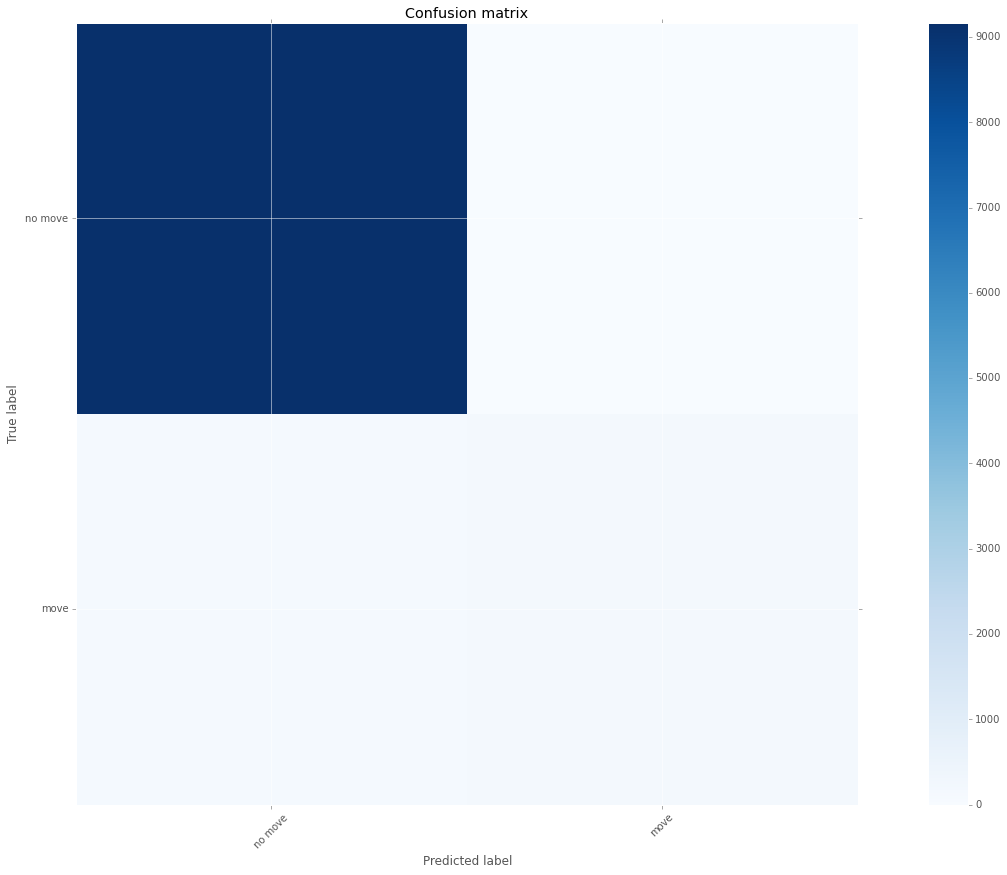

In [23]:
cm = confusion_matrix(y_test,y_pred)
print classification_report(y_test, y_pred)
print('Confusion matrix, Random Forect Classifier')
print(cm)
plt.figure(figsize=(20,12))
plot_confusion_matrix(cm)

# Dealing with Imbalanced Classes
- Our dataset is highly imblanaced where the minority class "Move" is heavily outnumbered by the "Not Move" Class.
- Most classification algorithms will only perform optimally when the number of samples of each class is roughly the same. 
- Thus, we address this issue by re-sampling the dataset to offset this imbalance.
- We resample our dataset by undersampling the majority class.

In [24]:
def balanced_subsample(x,y,subsample_size=0.15):
    '''
    Performs sampling technique that downsamples 
    the majority class.
    '''
    class_xs = []
    min_elems = None
    max_elems = None

    for yi in np.unique(y):
        elems = x[(y == yi)]
        class_xs.append((yi, elems))
        if min_elems == None or elems.shape[0] < min_elems:
            min_elems = elems.shape[0]
        if max_elems == None or elems.shape[0] > max_elems:
            max_elems = elems.shape[0]
    print 'Before Balancing: (Label, Frequency)', [(t[0], len(t[1])) for t in class_xs]

    use_elems = min_elems
    if subsample_size < 1:
        max_elems = int(max_elems*subsample_size)

    xs = []
    ys = []

    for ci,this_xs in class_xs:
        if len(this_xs) > use_elems:
            np.random.shuffle(this_xs)
            x_ = this_xs[:max_elems]
            y_ = np.empty(max_elems)
            y_.fill(ci)

            xs.append(x_)
            ys.append(y_)
        else:
            x_ = this_xs[:use_elems]
            y_ = np.empty(use_elems)
            y_.fill(ci)

            xs.append(x_)
            ys.append(y_)

    xs = np.concatenate(xs)
    ys = np.concatenate(ys)

    return xs,ys

In [25]:
Xs, ys = balanced_subsample(X, y, 0.06)
print 'After Balancing: (Label, Frequency) ', [t for t in zip(range(0,2), (len(ys[ys == 0]), len(ys[ys == 1])))]

Before Balancing: (Label, Frequency) [(0, 45892), (1, 1439)]
After Balancing: (Label, Frequency)  [(0, 2753), (1, 1439)]


## Random Forest Classifier

In [26]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

#Build and Train Our Random Forect Classifier
n_trees = 1000
max_features = 'auto'
n_jobs = -1
rf = RFC(n_estimators = n_trees, max_features = max_features, n_jobs = n_jobs)
rf.fit(Xs_train, ys_train)

ys_pred = rf.predict(Xs_test)

In [27]:
def evaluate(y_true, y_pred, model):
    test_err = (y_true != y_pred).sum() / float(len(y_pred))
    
    print 'Test Error = ' + str(test_err)
    print "Accuracy: " + str(accuracy_score(y_true, y_pred))
    print "\n"
    
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion matrix ' + model)
    print(cm)
    plt.figure(figsize=(20, 12))
    plot_confusion_matrix(cm)

### Model Evaluation

- As we can see in our confusion matrix figure below, there are higher diagonal values of the confusion matrix than non-diagonal values of the confusion matrix, which indicates that our random forest model has made many correct predictions. 
- As well, there are less false negatives now after we balanced the classes. This is very good becasue it is costly for a real estate agent to miss a potential client.
- The precision, recall, and f1-score of the model are all 86%.
- The cross_validated accuracy score of our Random Forest model was 83.5% +/- 2.1% for cv=5.

             precision    recall  f1-score   support

        0.0       0.88      0.93      0.90       570
        1.0       0.83      0.73      0.78       269

avg / total       0.86      0.87      0.86       839

Test Error = 0.134684147795
Accuracy: 0.865315852205


Confusion matrix Random Forest Classifier
[[529  41]
 [ 72 197]]


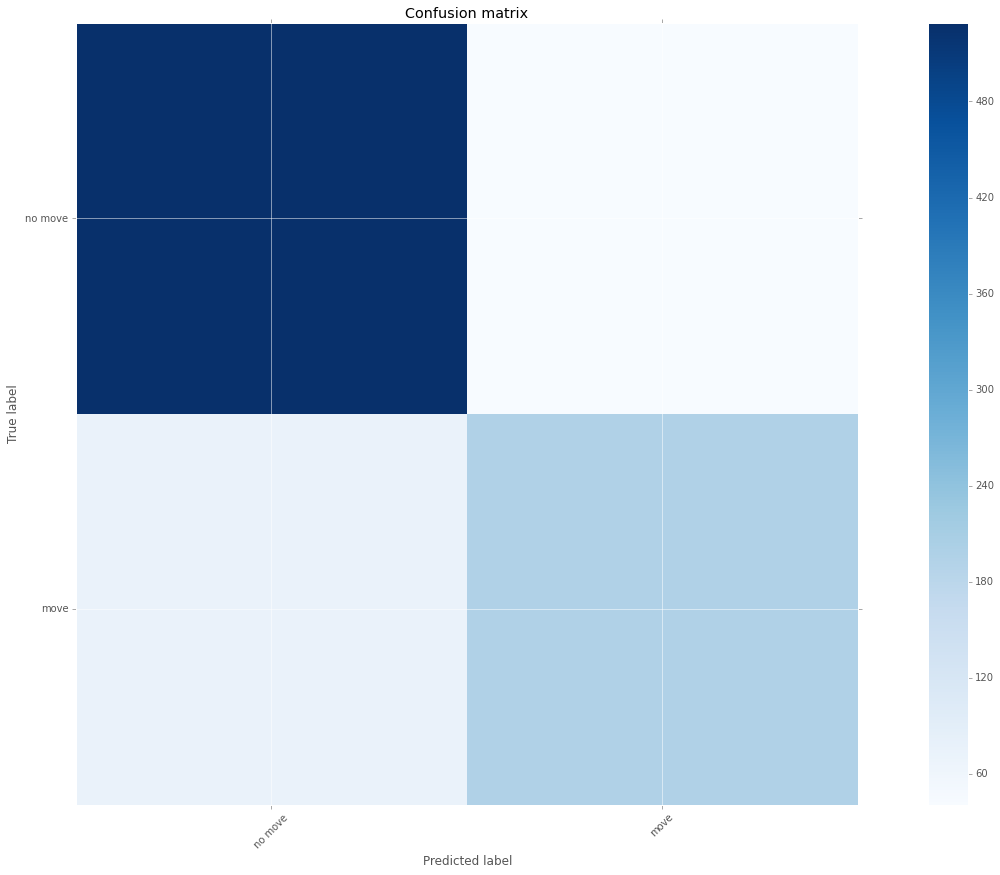

In [28]:
print classification_report(ys_test, ys_pred)
evaluate(ys_test, ys_pred, "Random Forest Classifier")

In [29]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(rf, Xs_train, ys_train, scoring='accuracy', cv=5, n_jobs=-1)
print 'The Accuracy CV score is %0.3f (+/- %0.3f)' %(scores.mean(), scores.std())
print scores

The Accuracy CV score is 0.829 (+/- 0.025)
[ 0.83308495  0.85991058  0.83159463  0.78358209  0.83432836]


### Feature Importance
- The figure below shows the use of forests of decision trees to evaluate the importance of features on our moving classification task. 
- The green horizontal bars are the feature importances of the forest. As we can see, there are 5 features that are most informative (Marital Status in the Household, Home Loan to Value, Home Year Built, Home Square Footage, and Home Length of Residence).

In [30]:
num_importances = rf.feature_importances_[:7]
cat_features = ['Home Loan-to-Value - Estimated - Ranges', 'Home Market Value - Estimated', 'Marital Status in the Household']
d = {}

t = zip(vectorizer.get_feature_names(), rf.feature_importances_[7:])
for cat_i, importance in t:
    cat, letter = cat_i.split('=')
    for cat_j in cat_features:
        if cat == cat_j:
            if cat in d:
                d[cat] += importance
            else:
                d[cat] = importance

features_name = numeric_cols + cat_features
importances = list(num_importances) + d.values()
RF_feat_d = {k:v for (k,v) in zip(features_name, importances)}
print RF_feat_d

{'Census Median Home Value': 0.10505752921969828, 'Marital Status in the Household': 0.11608602183018847, 'Census Median Household Income': 0.10658161581706357, 'Home Square Footage - Actual': 0.14980273439603059, 'Home Year Built - Actual': 0.12728546780350289, 'Home Market Value - Estimated': 0.038068481931652423, 'Income - Estimated Household': 0.066521825116397038, 'Home Length of Residence': 0.13841107423659427, 'Home Loan-to-Value - Estimated - Ranges': 0.10915344848571319, 'Generations in Household': 0.043031801163159293}


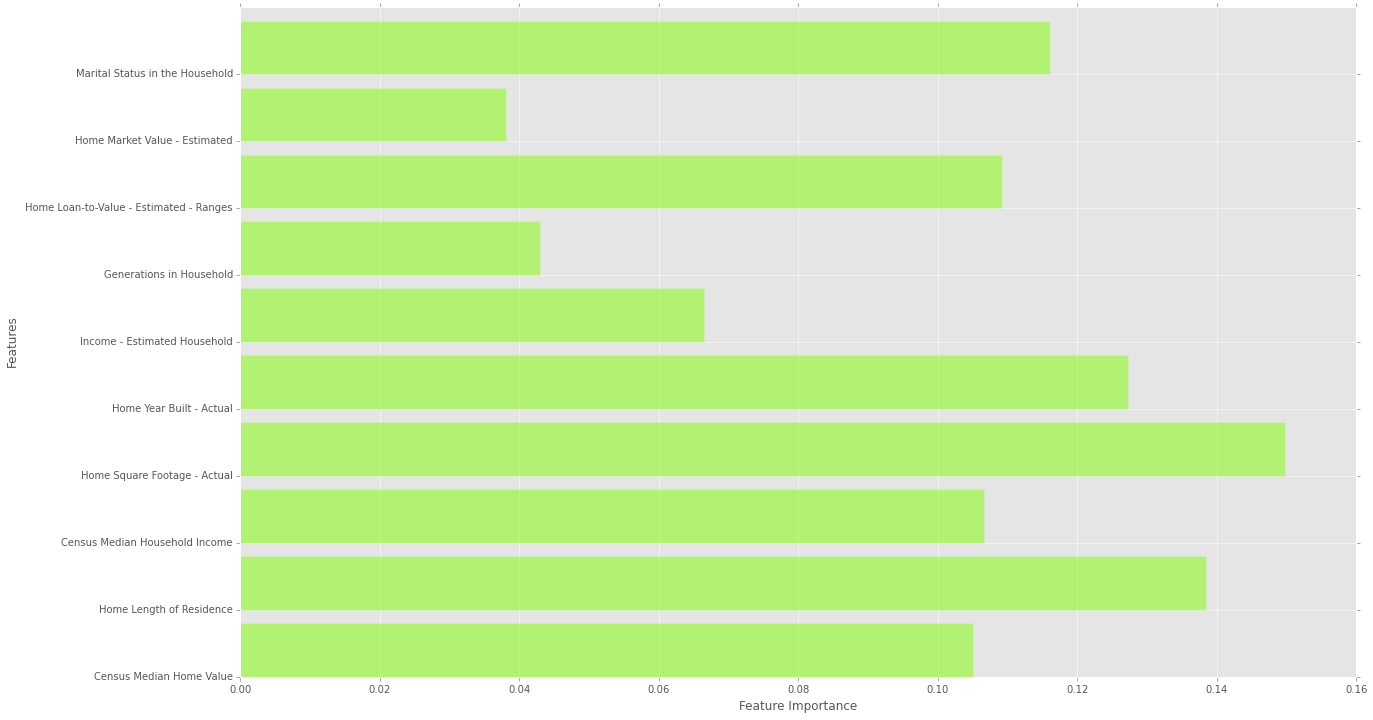

In [31]:
def generateFeatureImportancePlotRF(forest, features_name, importances):
    y_pos = np.arange(len(features_name))
    plt.figure(figsize=(20,12))
    plt.barh(y_pos, importances, alpha=0.5, color='chartreuse')
    plt.yticks(y_pos, features_name)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.axis([0.00, 0.16, min(y_pos), max(y_pos) + 1])
    
generateFeatureImportancePlotRF(rf, features_name, importances)

## Boosting Techniques

- We built a gradient boosting classifier and a Ada boosting classifier to see if we could create a classification model that performed better than our Random Forest Classifier.
- Despite our best attempts, neither classifier was able to outperform our Random Forest Classifier for our moving classification task.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)
learning_rate = 0.1
n_estimators = 1000

gbT = GBC(learning_rate = learning_rate, n_estimators = n_estimators)
gbT.fit(Xs_train, ys_train)

ys_pred = gbT.predict(Xs_test)

### Gradient Boosting Classifier

#### Model Evaluation

             precision    recall  f1-score   support

        0.0       0.85      0.86      0.85       570
        1.0       0.69      0.68      0.69       269

avg / total       0.80      0.80      0.80       839

Test Error = 0.199046483909
Accuracy: 0.800953516091


Confusion matrix Gradient Boosting Classifier
[[488  82]
 [ 85 184]]


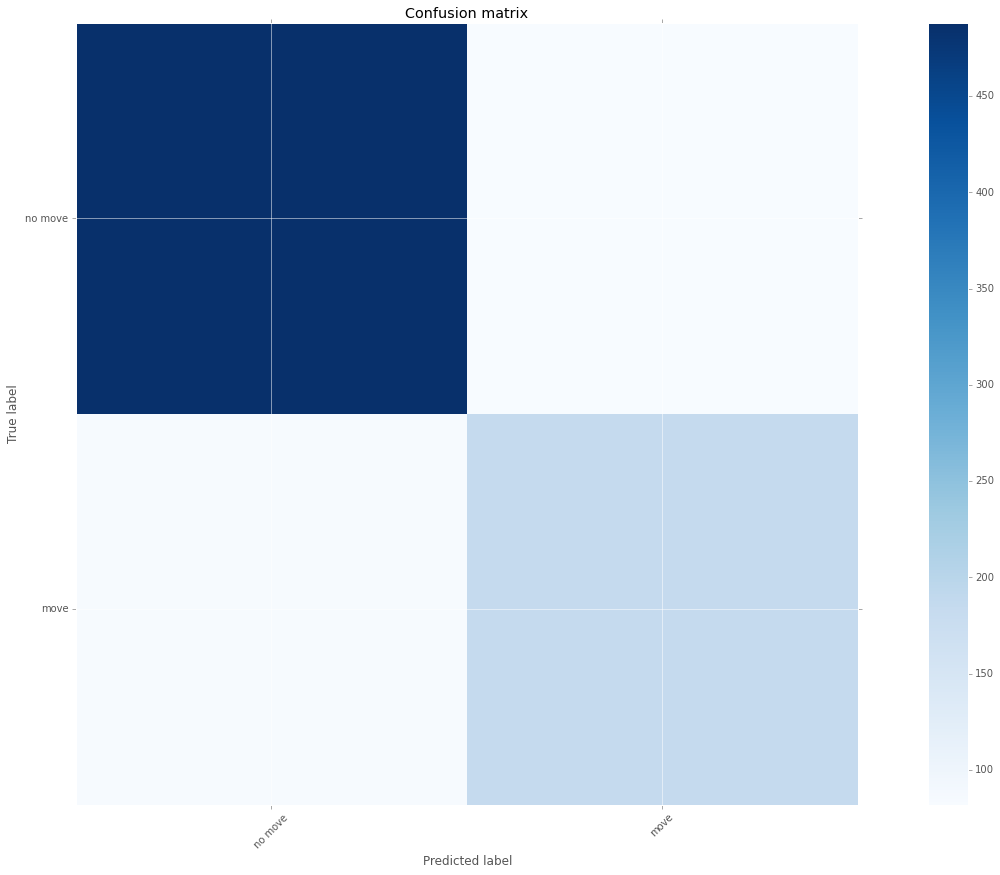

In [33]:
print classification_report(ys_test, ys_pred)
evaluate(ys_test, ys_pred, "Gradient Boosting Classifier")

### Ada Boosting Classifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier as ABC

learning_rate = 0.01
n_estimators = 1000
abT = ABC(learning_rate = learning_rate, n_estimators = n_estimators)
abT.fit(Xs_train, ys_train)

ys_pred = abT.predict(Xs_test)

#### Model Evaluation

             precision    recall  f1-score   support

        0.0       0.73      0.87      0.80       570
        1.0       0.54      0.32      0.40       269

avg / total       0.67      0.70      0.67       839

Test Error = 0.303933253874
Accuracy: 0.696066746126


Confusion matrix Ada Boosting Classifier
[[498  72]
 [183  86]]


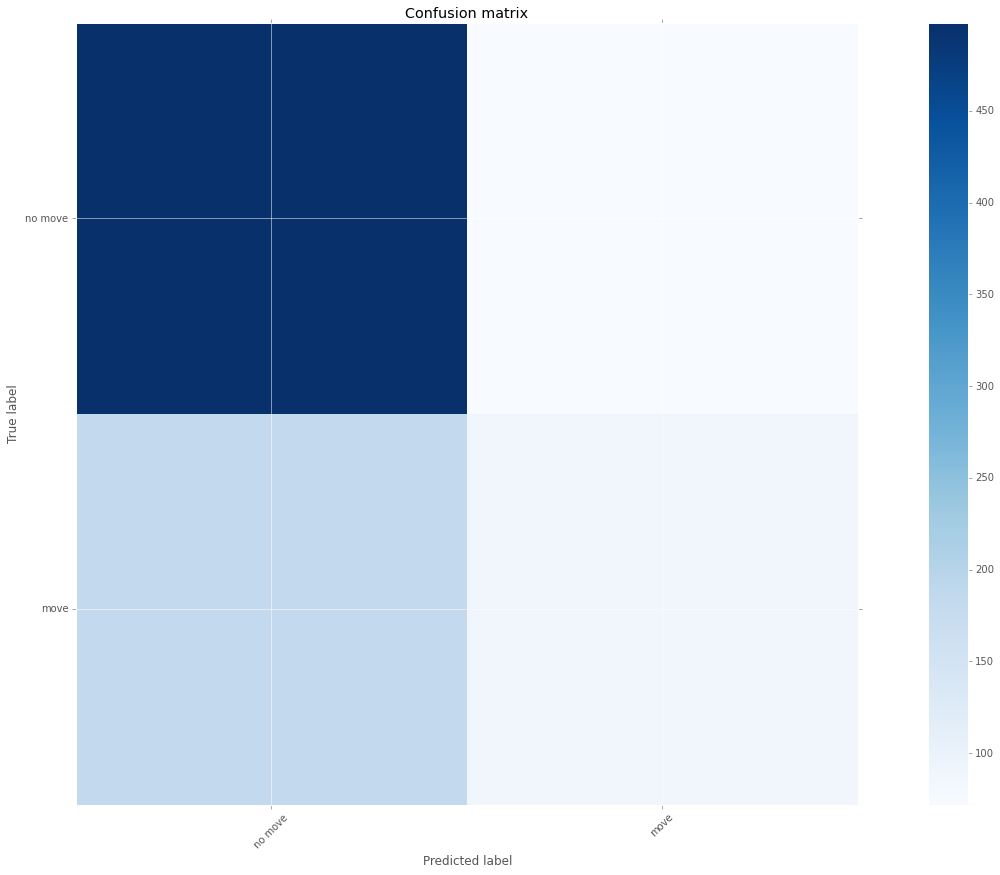

In [35]:
print classification_report(ys_test, ys_pred)
evaluate(ys_test, ys_pred, "Ada Boosting Classifier")

## Determine People most likely to Move
- Calculate the predicted label probabilities of our dataset, which is computed as the mean predicted class probabilities of the trees in the forest.
- We then reverse sort the probabilities corresponding to the positive label ('Move') and obtain the 100 Person_ids that are most likely to convert.

In [36]:
#Drop PersonIds which have moved after May 2015.
nonMovers = df.drop(df[df['Home Purchase Date (YYYY/MM)_curr'] > 201505].index)
#Generate Features Matrix for nonMovers
features_nM = nonMovers[nonMovers.columns[5:]]
# features_nM.head()
features_nM = features_nM[list(columns_to_keep)]
features_nM.drop(['Home Purchase Date (YYYY/MM)_hist', 'Home Purchase Date (YYYY/MM)_curr'],axis=1,inplace=True)
features_imputed_nM = DataFrameImputer().fit_transform(features_nM)
#Numerical Data
print 'Numerical Feature Column Names: ', numeric_cols 
x_num_nM = features_imputed_nM[numeric_cols].as_matrix()

#Categorical Data
cat_cols = set(features_imputed_nM.columns) - set(numeric_cols)
cat_nM = features_imputed_nM[list(cat_cols)]
x_cat_nM = cat_nM.T.to_dict().values()

#Vectorize 
vectorizer = DV( sparse = False )
vec_x_cat_nM = vectorizer.fit_transform(x_cat_nM)

# Generate Features Matrix by merging Numerical and Categorical Feature Data
X_nM = np.hstack((x_num_nM, vec_x_cat_nM))

Numerical Feature Column Names:  ['Census Median Home Value', 'Home Length of Residence', 'Census Median Household Income', 'Home Square Footage - Actual', 'Home Year Built - Actual', 'Income - Estimated Household', 'Generations in Household']


In [37]:
#Predict Most Likely Homeowners to Move
probabilites = rf.predict_proba(X_nM)
top100 = np.argsort(probabilites[:,1])[::-1][:100] #second column of probabilities array corresponds to Move Label
mostlikelyMovers = nonMovers.ix[top100]
movingprobability = pd.Series(probabilites[top100, 1])
potentialMovers = pd.Series(list(mostlikelyMovers.index))
potentialMovers = pd.concat([potentialMovers, movingprobability], axis=1)
potentialMovers.name = 'Most-Likely-100-Personids-To-Convert'
potentialMovers.columns = ['PersonId', 'Probability']
potentialMovers.to_csv('Most-Likely-100-Personids-To-Move.csv')

In [38]:
potentialMovers

,PersonId,Probability
0,9799VH60WU,0.899
1,9899AP24KC,0.862
2,9799VH9JPS,0.856
3,9799VHYDUO,0.854
4,9899Q9ID8N,0.854
5,9799VS7U3J,0.845
6,9799VHYQPI,0.844
7,979929Y34D,0.844
8,98994X7J22,0.843
9,9799Q49X70,0.839
